In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import the different datasets

In [2]:
items = pd.read_csv(r'./items.csv')
feedbacks = pd.read_csv(r'./feedbacks.csv')
feedbacks = feedbacks[feedbacks.isna().any(axis = 1)]
feedbacks.marketplace.value_counts()

Evolution                7384
Silk Road 1               763
Black Market Reloaded      42
Hydra                      10
Alphabay                    4
Silk Road 2                 1
Name: marketplace, dtype: int64

# Data preparation item dataset

Since we are going to take out the entries that are talking about drugs. We are going to remove all titles and descriptions that contain NaN values.

In [3]:
items = items[items['title'].notna()]
items = items[items['description'].notna()]
items = items[~items['title'].str.contains('milligram')]
items = items[~items['description'].str.contains('milligram')]
items = items[~items['description'].str.contains('gram')]
items = items[~items['title'].str.contains('gram')]
items = items[~items['description'].str.contains('mg')]
items = items[~items['title'].str.contains('mg')]
items = items[~items['description'].str.contains('cocktail')]
items = items[~items['title'].str.contains('cocktail')]
items = items[~items['description'].str.contains('xtc')]
items = items[~items['title'].str.contains('xtc')]
items = items[~items['description'].str.contains('meth')]
items = items[~items['title'].str.contains('meth')]
items = items[~items['description'].str.contains('drug')]
items = items[~items['title'].str.contains('drug')]

# Checking the times of the marketplaces

In [4]:
feedbacks['date']= pd.to_datetime(feedbacks['date']) 
feedbacks_time = feedbacks.groupby(['marketplace']).agg({'date': [np.min,np.max]})
feedbacks_time['difference'] = feedbacks_time['date' ,'amax'] - feedbacks_time['date', 'amin']

### Normalizing values
Since the different marketplace have a different time for which they exist we are going to normalize the values in such a way that all the values have been normalized so that they show the value normalized per year. Therefore the normalization function looks like this:

f = original feedback value
t = time (taken from feedback_times["difference"]
normalized_value = f/t*365

In [5]:
feedbacks_time['difference', ""] = feedbacks_time['difference', ""].dt.days.astype('int16')

In [45]:
feedbacks_time

date            difference
                            amin       amax           
marketplace                                           
Agora                 2013-12-25 2015-02-11        413
Alphabay              2014-12-31 2017-05-26        877
Black Market Reloaded 2012-11-25 2013-11-30        370
Evolution             2014-01-14 2015-02-19        401
Hydra                 2014-04-14 2014-10-26        195
Pandora               2013-11-02 2014-10-13        345
Silk Road 1           2011-06-22 2013-08-19        789
Silk Road 2           2013-11-26 2014-10-28        336

In [46]:
a = int(feedbacks_time.loc[['Agora']]['difference', ''])

In [47]:
#Carefull the next two code blocks take a very long time to execute! (Maybe a lambda function might speed things up?)

In [ ]:
#for ind in feedbacks.index:
 #   x = feedbacks.iloc[ind].marketplace
  #  a = int(feedbacks_time.loc[[x]]['difference', ''])
   # norm_value = feedbacks.iloc[ind].feedback_value/a*365
    #feedbacks.iloc[ind].norm_feedback_value = norm_value

In [ ]:
#for ind in feedbacks.index:
 #   x = feedbacks.iloc[ind].marketplace
  #  a = int(feedbacks_time.loc[[x]]['difference', ''])
   # norm_value = feedbacks.iloc[ind].order_amount_usd/a*365
    #feedbacks.iloc[ind].norm_order_amount = norm_value

In [51]:
feedbacks.columns

Index(['hash_str', 'category', 'marketplace', 'item_hash', 'date',
       'giver_hash', 'receiver_hash', 'message', 'order_title',
       'feedback_value', 'order_amount_usd', 'norm_feedback_value',
       'norm_order_value'],
      dtype='object')

### Normalized plots per category

In [6]:
def normalize_feedback(marketplace, feedback_value):
    deltatime = int(feedbacks_time.loc[[marketplace]]['difference', ''])
    norm_value = feedback_value / deltatime * 365
    return norm_value
    

In [7]:
feedbacks['norm_feedback_value'] = feedbacks.apply(lambda x: normalize_feedback(x['marketplace'], x['feedback_value']), axis = 1)

ZeroDivisionError: float division by zero

In [ ]:
def normalize_order_value(marketplace, order_amount_usd):
    deltatime = int(feedbacks_time.loc[[marketplace]]['difference', ''])
    norm_value = order_amount_usd / deltatime * 365
    return norm_value

In [ ]:
feedbacks['norm_order_value'] = feedbacks.apply(lambda x: normalize_order_value(x['marketplace'], x['order_amount_usd']), axis = 1)

In [52]:
feedbacks.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


In [ ]:
feedbacks.to_csv(r'feedbacks.csv', index = False)

Text(0.5, 0, 'Item categories')

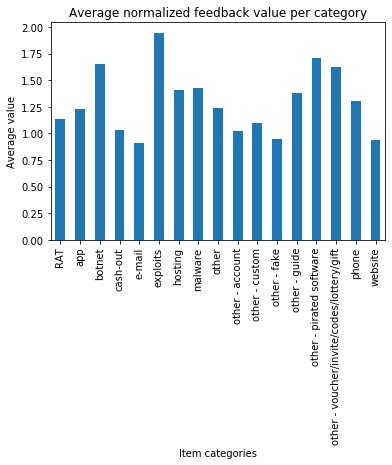

In [53]:
feedbacks.groupby(by = ['category']).mean().norm_feedback_value.plot(kind = 'bar', title = 'Average normalized feedback value per category')
plt.ylabel('Average value')
plt.xlabel('Item categories')

Text(0.5, 0, 'Item categories')

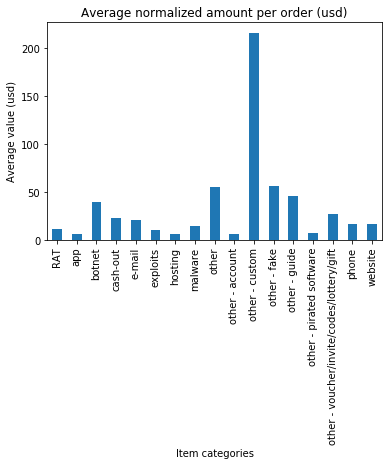

In [54]:
feedbacks.groupby(by = ['category']).mean().norm_order_value.plot(kind = 'bar', title = 'Average normalized amount per order (usd)')
plt.ylabel('Average value (usd)')
plt.xlabel('Item categories')

# Observing the data per marketplace

Text(0.5, 0, 'Marketplaces')

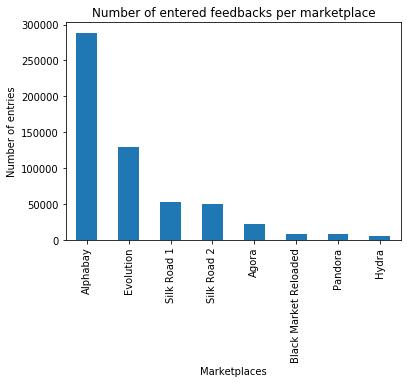

In [55]:
feedbacks.marketplace.value_counts().plot(kind = 'bar', title = 'Number of entered feedbacks per marketplace')
plt.ylabel('Number of entries')
plt.xlabel('Marketplaces')

In [56]:
dict1 = feedbacks.marketplace.value_counts().to_dict()

In [57]:
dict1

{'Alphabay': 288485,
 'Evolution': 128840,
 'Silk Road 1': 52564,
 'Silk Road 2': 50611,
 'Agora': 22539,
 'Black Market Reloaded': 8379,
 'Pandora': 7910,
 'Hydra': 4876}

In [58]:
dict2 = feedbacks_time['difference', ''].to_dict()

In [59]:
dict2

{'Agora': 413,
 'Alphabay': 877,
 'Black Market Reloaded': 370,
 'Evolution': 401,
 'Hydra': 195,
 'Pandora': 345,
 'Silk Road 1': 789,
 'Silk Road 2': 336}

In [60]:
dict3 = {k: dict1[k]/dict2[k] for k in dict1.keys() & dict2}

In [61]:
dict3

{'Hydra': 25.005128205128205,
 'Agora': 54.573849878934624,
 'Evolution': 321.29675810473816,
 'Silk Road 1': 66.62103929024082,
 'Silk Road 2': 150.6279761904762,
 'Pandora': 22.92753623188406,
 'Black Market Reloaded': 22.645945945945947,
 'Alphabay': 328.945267958951}

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

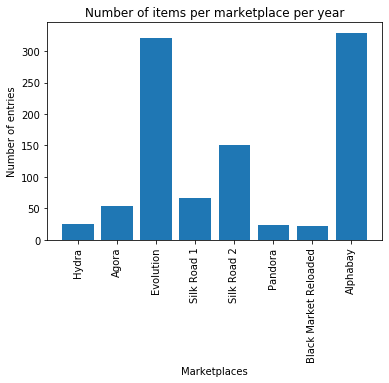

In [62]:
#corrected for the lifespan of markets
plt.bar([ str(i) for i in dict3.keys()], dict3.values())
plt.title("Number of items per marketplace per year")
plt.ylabel('Number of entries')
plt.xlabel('Marketplaces')
plt.xticks(rotation=90)

Text(0.5, 0, 'Marketplaces')

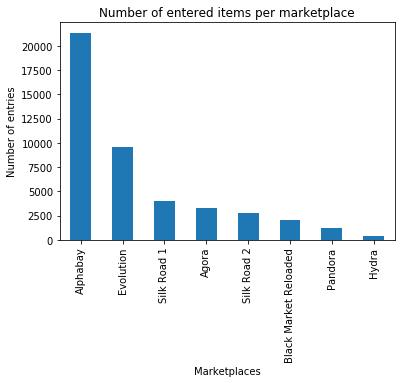

In [63]:
items.marketplace.value_counts().plot(kind = 'bar', title = 'Number of entered items per marketplace')
plt.ylabel('Number of entries')
plt.xlabel('Marketplaces')


Text(0.5, 0, 'Marketplaces')

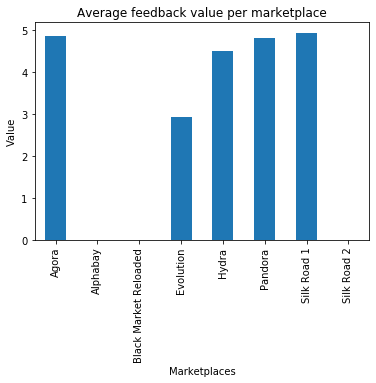

In [64]:
#Since the next figure does not take into account the normalized value I guess we can take this one out too.
feedbacks.groupby(by = ['marketplace']).mean().feedback_value.plot(kind = 'bar', title = 'Average feedback value per marketplace')
plt.ylabel('Value')
plt.xlabel('Marketplaces')

Text(0.5, 0, 'Marketplaces')

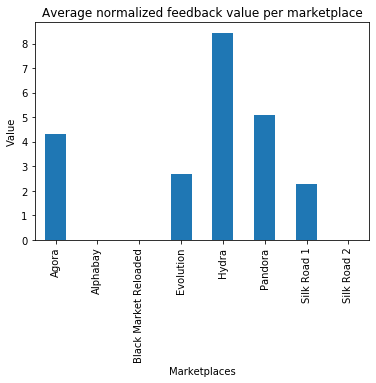

In [65]:
feedbacks.groupby(by = ['marketplace']).mean().norm_feedback_value.plot(kind = 'bar', title = 'Average normalized feedback value per marketplace')
plt.ylabel('Value')
plt.xlabel('Marketplaces')

Text(0.5, 0, 'Marketplaces')

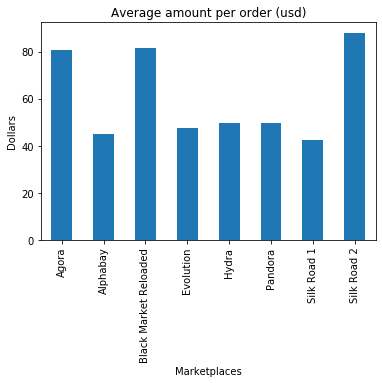

In [66]:
feedbacks.groupby(by = ['marketplace']).mean().order_amount_usd.plot(kind = 'bar', title = 'Average amount per order (usd)')
plt.ylabel('Dollars')
plt.xlabel('Marketplaces')

Text(0.5, 0, 'Marketplaces')

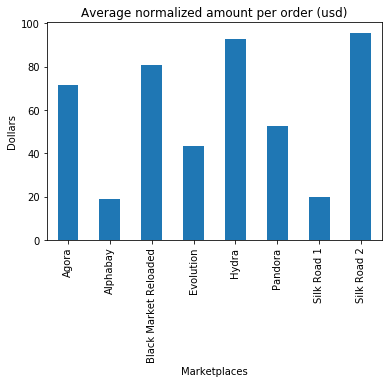

In [67]:
feedbacks.groupby(by = ['marketplace']).mean().norm_order_value.plot(kind = 'bar', title = 'Average normalized amount per order (usd)')
plt.ylabel('Dollars')
plt.xlabel('Marketplaces')

# Observing the data per category and marketplace
### Average feedback values

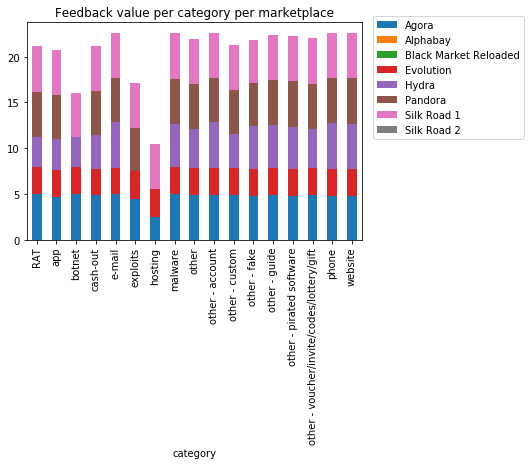

In [68]:
df2 = feedbacks.groupby(by = ['category', 'marketplace']).mean().unstack().feedback_value
df2.plot(kind = 'bar', stacked = True, title = "Feedback value per category per marketplace")
#plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

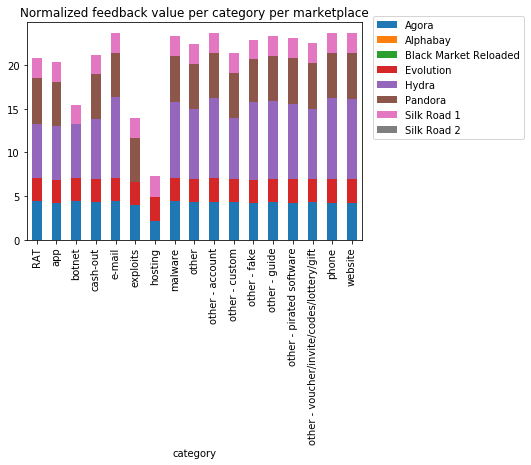

In [69]:
df2 = feedbacks.groupby(by = ['category', 'marketplace']).mean().unstack().norm_feedback_value
df2.plot(kind = 'bar', stacked = True, title = "Normalized feedback value per category per marketplace")
#plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

### Average order amounts

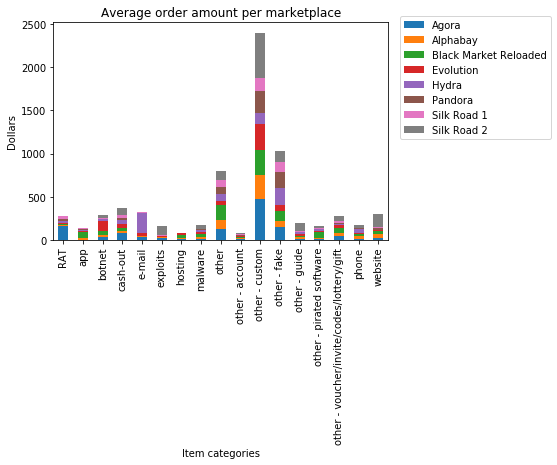

In [70]:
df = feedbacks.groupby(by = ['category', 'marketplace']).mean().unstack().order_amount_usd
df.plot(kind = 'bar', stacked = True, title = "Average order amount per marketplace")
#plt.xticks(rotation=45)
plt.xlabel('Item categories')
plt.ylabel('Dollars')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

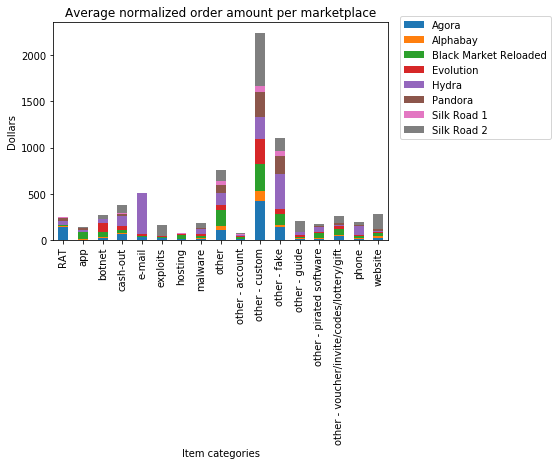

In [71]:
df = feedbacks.groupby(by = ['category', 'marketplace']).mean().unstack().norm_order_value
df.plot(kind = 'bar', stacked = True, title = "Average normalized order amount per marketplace")
#plt.xticks(rotation=45)
plt.xlabel('Item categories')
plt.ylabel('Dollars')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

### Total order amounts

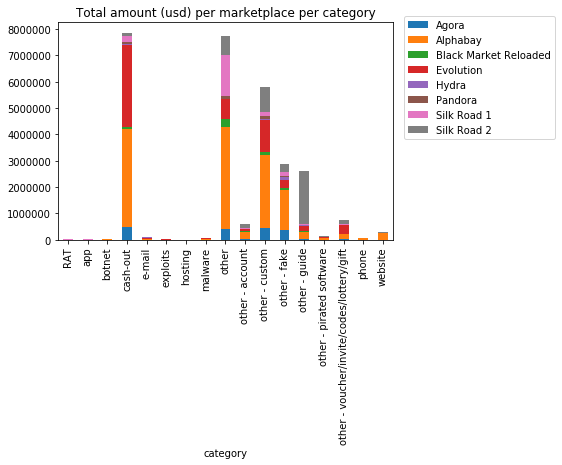

In [72]:
df = feedbacks.groupby(by = ['category', 'marketplace']).sum().unstack().order_amount_usd
df.plot(kind = 'bar', stacked = True, title = "Total amount (usd) per marketplace per category")
#plt.xticks(rotation=45)
#plt.yscale('log')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

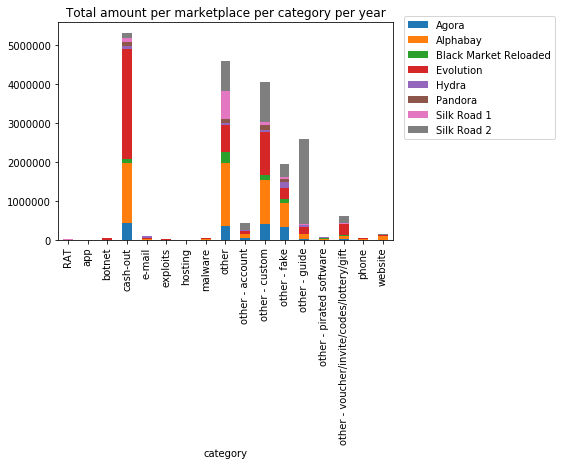

In [73]:
df = feedbacks.groupby(by = ['category', 'marketplace']).sum().unstack().norm_order_value
df.plot(kind = 'bar', stacked = True, title = "Total amount per marketplace per category per year")
#plt.xticks(rotation=45)
#plt.yscale('log')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

In [74]:
feedbacks.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


Text(0.5, 0, 'Categories')

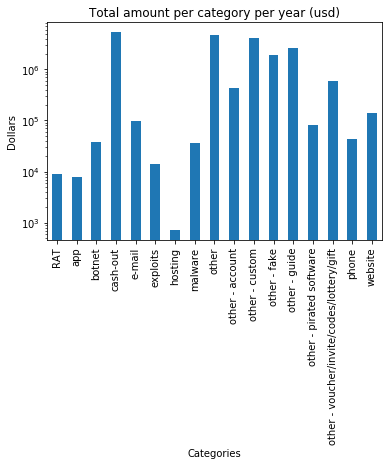

In [75]:
feedbacks.groupby(by = ['category']).sum().norm_order_value.plot(kind = 'bar', title = 'Total amount per category per year (usd)')
plt.ylabel('Dollars')
plt.yscale('log')
plt.xlabel('Categories')

Text(0.5, 0, 'Marketplaces')

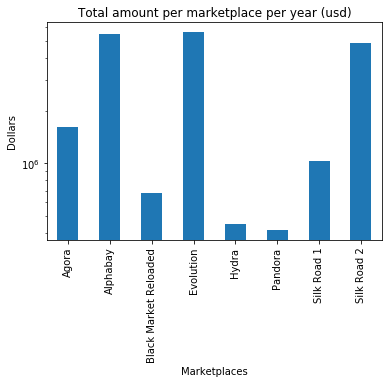

In [76]:
feedbacks.groupby(by = ['marketplace']).sum().norm_order_value.plot(kind = 'bar', title = 'Total amount per marketplace per year (usd)')
plt.ylabel('Dollars')
plt.yscale('log')
plt.xlabel('Marketplaces')

# After filtering data with other

In [8]:
feedbacks2 = feedbacks[feedbacks.category != "other"]

In [82]:
feedbacks2.category.unique

<bound method Series.unique of 0                                           malware
1                                           malware
2                                           malware
3                                           malware
4                                           malware
                            ...                    
480118    other - voucher/invite/codes/lottery/gift
480119    other - voucher/invite/codes/lottery/gift
480120    other - voucher/invite/codes/lottery/gift
480121    other - voucher/invite/codes/lottery/gift
480122    other - voucher/invite/codes/lottery/gift
Name: category, Length: 480123, dtype: object>

In [9]:
feedbacks2['norm_feedback_value'] = feedbacks2.apply(lambda x: normalize_feedback(x['marketplace'], x['feedback_value']), axis = 1)

ZeroDivisionError: float division by zero

In [ ]:
feedbacks2['norm_order_value'] = feedbacks2.apply(lambda x: normalize_order_value(x['marketplace'], x['order_amount_usd']), axis = 1)

Text(0.5, 0, 'Item categories')

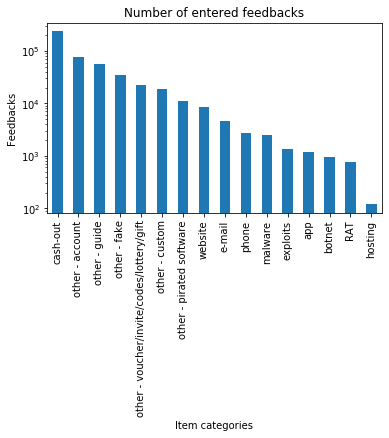

In [83]:
#Number of entered feedbacks
fig = feedbacks2.category.value_counts().plot(kind = 'bar', title = 'Number of entered feedbacks', figsize=(6,3.5), fontsize=10).get_figure()
plt.yscale('log')
plt.ylabel('Feedbacks')
plt.xlabel('Item categories')
#fig.savefig('# entered feedbacks (logscale).jpg')

Text(0.5, 0, 'Item categories')

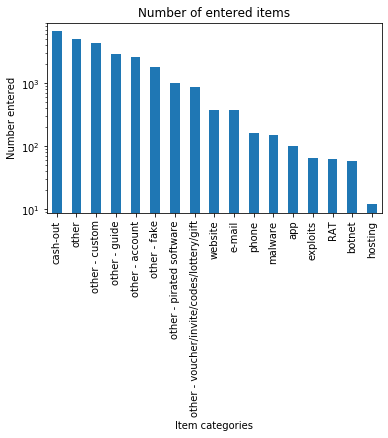

In [84]:
#Number of entered transactions
fig = items4.category.value_counts().plot(kind = 'bar', title = 'Number of entered items', figsize=(6,3.5), fontsize=10).get_figure()
plt.yscale('log')
plt.ylabel('Number entered')
plt.xlabel('Item categories')
#fig.savefig('# entered feedbacks (logscale).jpg')

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

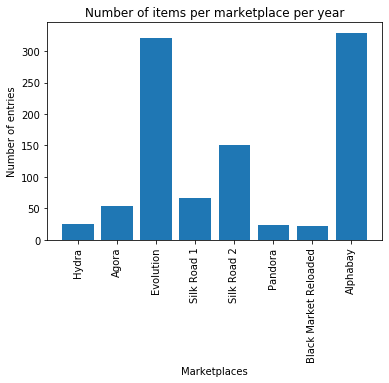

In [85]:
#Number of items per marketplace per year
dict1 = feedbacks2.marketplace.value_counts().to_dict()
dict2 = feedbacks_time['difference', ''].to_dict()

#corrected for the lifespan of markets
plt.bar([ str(i) for i in dict3.keys()], dict3.values())
plt.title("Number of items per marketplace per year")
plt.ylabel('Number of entries')
plt.xlabel('Marketplaces')
plt.xticks(rotation=90)

Text(0.5, 0, 'Marketplaces')

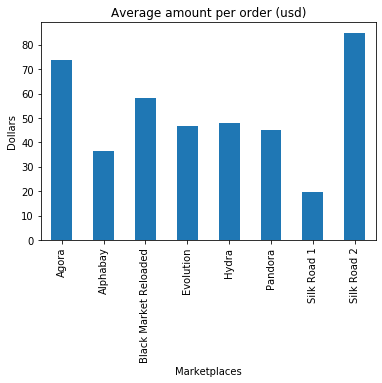

In [86]:
#Average amount per marketplace
feedbacks2.groupby(by = ['marketplace']).mean().order_amount_usd.plot(kind = 'bar', title = 'Average amount per order (usd)')
plt.ylabel('Dollars')
plt.xlabel('Marketplaces')

Text(0.5, 0, 'Item categories')

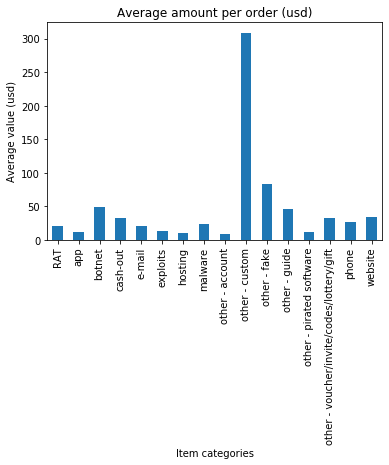

In [87]:
#Average amount per category
feedbacks2.groupby(by = ['category']).mean().order_amount_usd.plot(kind = 'bar', title = 'Average amount per order (usd)')
plt.ylabel('Average value (usd)')
plt.xlabel('Item categories')

Text(0.5, 0, 'Categories')

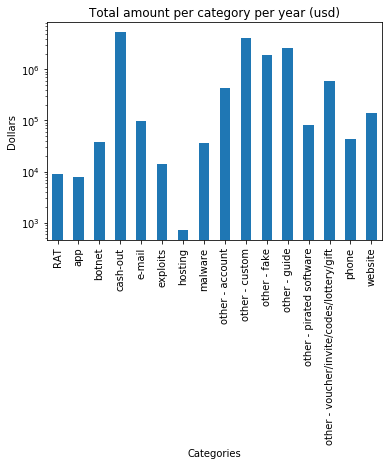

In [88]:
#Total amount per category per year
feedbacks2.groupby(by = ['category']).sum().norm_order_value.plot(kind = 'bar', title = 'Total amount per category per year (usd)')
plt.ylabel('Dollars')
plt.yscale('log')
plt.xlabel('Categories')

Text(0.5, 0, 'Marketplaces')

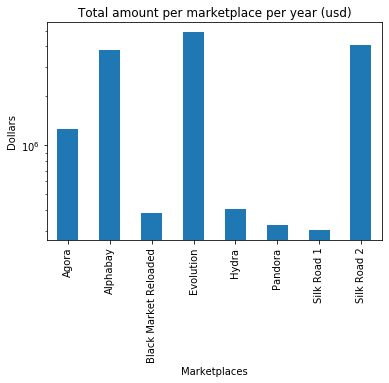

In [89]:
#Total amount per marketplace per year
feedbacks2.groupby(by = ['marketplace']).sum().norm_order_value.plot(kind = 'bar', title = 'Total amount per marketplace per year (usd)')
plt.ylabel('Dollars')
plt.yscale('log')
plt.xlabel('Marketplaces')

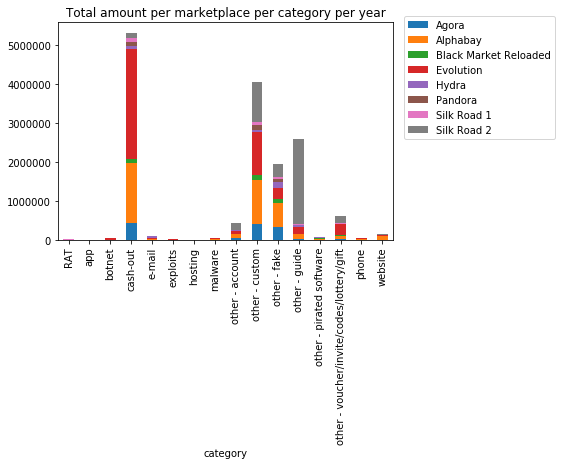

In [90]:
#Total amount per category per marketplace per year
df = feedbacks2.groupby(by = ['category', 'marketplace']).sum().unstack().norm_order_value
df.plot(kind = 'bar', stacked = True, title = "Total amount per marketplace per category per year")
#plt.xticks(rotation=45)
#plt.yscale('log')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

Text(0.5, 0, 'Item categories')

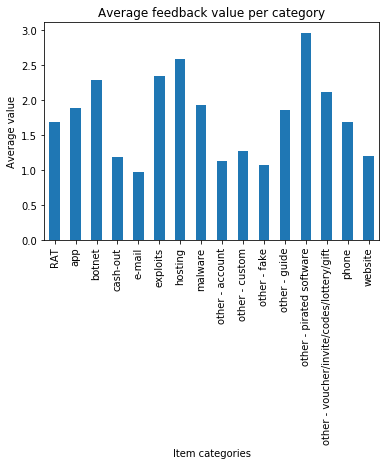

In [91]:
#Average feedback value per category
feedbacks2.groupby(by = ['category']).mean().feedback_value.plot(kind = 'bar', title = 'Average feedback value per category')
plt.ylabel('Average value')
plt.xlabel('Item categories')

Text(0.5, 0, 'Item categories')

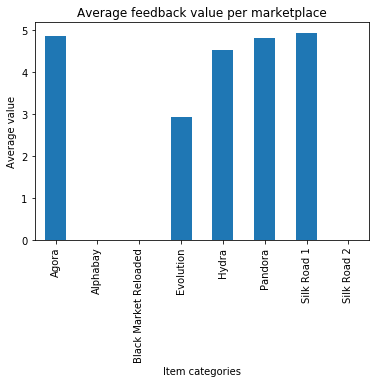

In [92]:
#Average feedback value per marketplace
feedbacks2.groupby(by = ['marketplace']).mean().feedback_value.plot(kind = 'bar', title = 'Average feedback value per marketplace')
plt.ylabel('Average value')
plt.xlabel('Item categories')

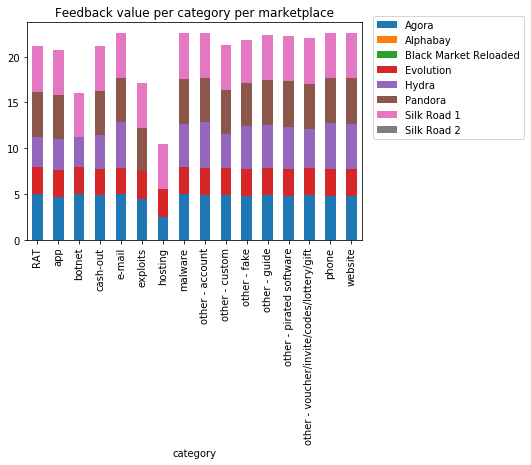

In [93]:
#Average feedback value per category per marketplace
df2 = feedbacks2.groupby(by = ['category', 'marketplace']).mean().unstack().feedback_value
df2.plot(kind = 'bar', stacked = True, title = "Feedback value per category per marketplace")
#plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

# Keyword analysis

In [94]:
feedbacks2.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


In [95]:
freq = pd.Series(' '.join(feedbacks2['order_title']).split()).value_counts()[:50]


Text(0, 0.5, 'Number of occurences')

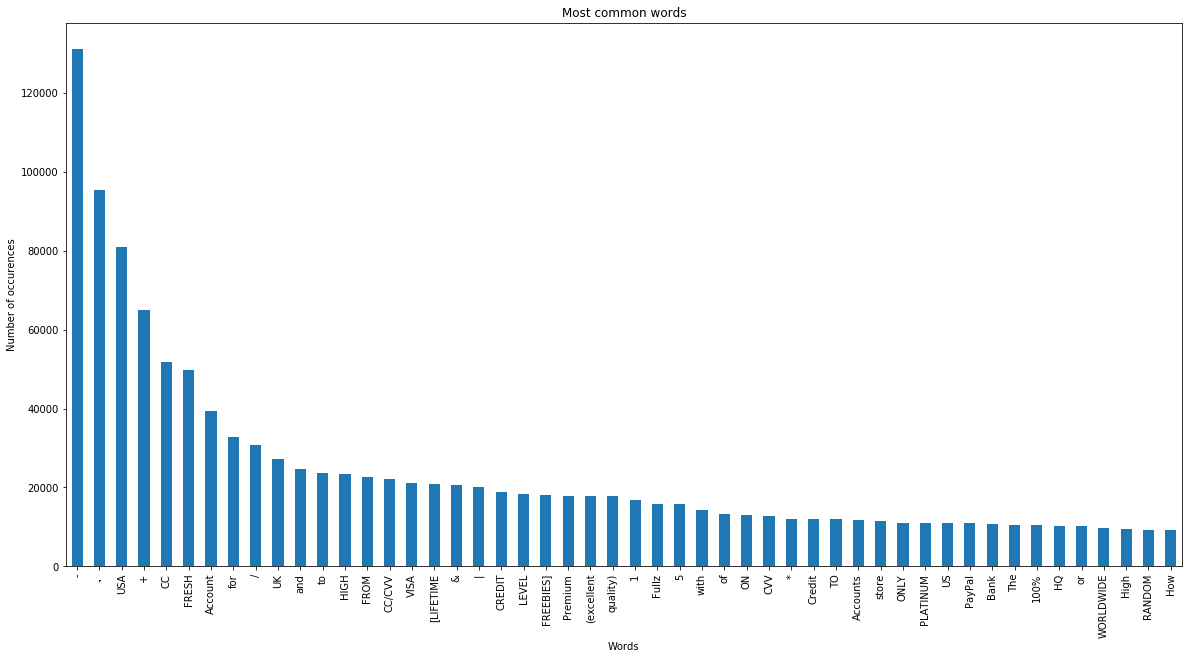

In [96]:
ax = freq.plot(kind = 'bar', title = "Most common words", figsize = (20,10))
ax.set_xlabel("Words")
ax.set_ylabel("Number of occurences")

### Plotting timeseries

In [99]:
feedbacks.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


In [100]:
feedbacks2.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


We are only looking at the cash-out category to look at the financial models, therefore only take the entries in this category

In [10]:
feedbacks_cash_out = feedbacks2[feedbacks["category"] == "cash-out"]

<ipython-input-10-5731fb462ca9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feedbacks_cash_out = feedbacks2[feedbacks["category"] == "cash-out"]


In [103]:
feedbacks_cash_out.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
22850,e10fbce446b45a23a035e84bd497e214,cash-out,Alphabay,00019696ba886889ed7612e2938f97a0,2017-05-15,db0dd81b0c5c8158c44ddbfaa6e89f9f,2371addc4198d8ca4e938071c8670c79,For My 30 American Dollars I Was Mad . Mad As ...,RANDOM USA TRACK2 101/201 With City-zip-state,0.0,30.0,0.0,12.485747
22851,7329cb0ae553927ba4e5919c26793b8c,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-22,eaa7765373397f14c29f97e15dd379b1,ddb9aab6486cdbc03021cdde20e1e00f,Quick delivery and great stealth packaging,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
22852,8dea34c217b7a5f5c1b12c59b3b173f5,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-14,ec786c008009944e566f913fe2ddf4f6,ddb9aab6486cdbc03021cdde20e1e00f,"Lightning fast shipping, thanks!",Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
22853,b657e90c8ae0468de3f01ec82f2d19b0,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-06-01,bec72ba38d386a1f213b7f1e5b06c0ea,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
22854,e71da61b095bf11a2413ad3ada675094,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-26,d6b8b3c5e4fbd6566997bda2888d77a9,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738


In [107]:
#df.groupby(pd.TimeGrouper(freq='M')).mean()
feedbacks_cash_out.groupby(pd.Grouper(freq='Y')).sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [108]:
feedbacks_cash_out.dtypes

hash_str                       object
category                       object
marketplace                    object
item_hash                      object
date                   datetime64[ns]
giver_hash                     object
receiver_hash                  object
message                        object
order_title                    object
feedback_value                float64
order_amount_usd              float64
norm_feedback_value           float64
norm_order_value              float64
dtype: object

In [111]:
feedbacks_cash_out.set_index('date', inplace = True)

In [112]:
feedbacks_cash_out.dtypes

hash_str                object
category                object
marketplace             object
item_hash               object
giver_hash              object
receiver_hash           object
message                 object
order_title             object
feedback_value         float64
order_amount_usd       float64
norm_feedback_value    float64
norm_order_value       float64
dtype: object

In [122]:
feedbacks_cash_out.groupby("market", pd.Grouper(freq='Y')).sum().plot()

ValueError: No axis named TimeGrouper(freq=<YearEnd: month=12>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0) for object type <class 'pandas.core.frame.DataFrame'>

In [117]:
feedbacks2.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


In [11]:
feedbacks3 = feedbacks2[feedbacks2["category"] == "cash-out"]

In [13]:
feedbacks3.groupby(by="marketplace")

In [123]:
feedbacks_cash_out.head()

,hash_str,category,marketplace,item_hash,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
date,,,,,,,,,,,,
2017-05-15,e10fbce446b45a23a035e84bd497e214,cash-out,Alphabay,00019696ba886889ed7612e2938f97a0,db0dd81b0c5c8158c44ddbfaa6e89f9f,2371addc4198d8ca4e938071c8670c79,For My 30 American Dollars I Was Mad . Mad As ...,RANDOM USA TRACK2 101/201 With City-zip-state,0.0,30.0,0.0,12.485747
2016-05-22,7329cb0ae553927ba4e5919c26793b8c,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,eaa7765373397f14c29f97e15dd379b1,ddb9aab6486cdbc03021cdde20e1e00f,Quick delivery and great stealth packaging,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
2016-05-14,8dea34c217b7a5f5c1b12c59b3b173f5,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,ec786c008009944e566f913fe2ddf4f6,ddb9aab6486cdbc03021cdde20e1e00f,"Lightning fast shipping, thanks!",Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
2016-06-01,b657e90c8ae0468de3f01ec82f2d19b0,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,bec72ba38d386a1f213b7f1e5b06c0ea,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
2016-05-26,e71da61b095bf11a2413ad3ada675094,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,d6b8b3c5e4fbd6566997bda2888d77a9,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738


In [125]:
feedbacks3.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
22850,e10fbce446b45a23a035e84bd497e214,cash-out,Alphabay,00019696ba886889ed7612e2938f97a0,2017-05-15,db0dd81b0c5c8158c44ddbfaa6e89f9f,2371addc4198d8ca4e938071c8670c79,For My 30 American Dollars I Was Mad . Mad As ...,RANDOM USA TRACK2 101/201 With City-zip-state,0.0,30.0,0.0,12.485747
22851,7329cb0ae553927ba4e5919c26793b8c,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-22,eaa7765373397f14c29f97e15dd379b1,ddb9aab6486cdbc03021cdde20e1e00f,Quick delivery and great stealth packaging,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
22852,8dea34c217b7a5f5c1b12c59b3b173f5,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-14,ec786c008009944e566f913fe2ddf4f6,ddb9aab6486cdbc03021cdde20e1e00f,"Lightning fast shipping, thanks!",Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
22853,b657e90c8ae0468de3f01ec82f2d19b0,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-06-01,bec72ba38d386a1f213b7f1e5b06c0ea,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738
22854,e71da61b095bf11a2413ad3ada675094,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-26,d6b8b3c5e4fbd6566997bda2888d77a9,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738


In [14]:
#df['year'] = pd.DatetimeIndex(df['birth_date']).year
feedbacks3["year"] = pd.DatetimeIndex(feedbacks3["date"]).year

<ipython-input-14-541f9ad6c97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks3["year"] = pd.DatetimeIndex(feedbacks3["date"]).year


In [11]:
feedbacks3.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value,year
23949,6521bfcd7f3f418f50ec9e0107659388,cash-out,Evolution,0062663c78e02f3e28b011ae3fbd870c,2014-07-12,ad5c5ce3acf708e7733733588c494db6,a97a5a3ba67bbad14596f758a0bd9484,NaN,Chase Bank Logins - USA,3.0,50.39,2.730673,45.866209,2014
24781,1987be072c313c20b06279277905787d,cash-out,Silk Road 1,00eed2ff062d0e48316ebfbfbf318fc6,2012-04-28,6bf013059b63d2c42f6adc9ddd7ef941,4732359aac608dd12055d9b7cd8cb314,NaN,TRIFORCE,5.0,10.06,2.313054,4.653866,2012
25327,1a09f7320d4d981965b9bafb1417bc1a,cash-out,Evolution,011c72c90139315058c16804cf44baa0,2014-05-26,21d4fd30bc9a8bb601c611477fbb483d,ca5e85ba0660c0839c8d278d7bb68492,NaN,***BESTSELLER*** BitCoin Mining - Referral cod...,3.0,4.53,2.730673,4.123317,2014
25328,2572df989d36788ef7987006ac4a3be4,cash-out,Evolution,011c72c90139315058c16804cf44baa0,2014-06-11,b105c54bff312e253ab3202b12ae99c0,ca5e85ba0660c0839c8d278d7bb68492,NaN,***BESTSELLER*** BitCoin Mining - Referral cod...,3.0,4.53,2.730673,4.123317,2014
25330,2b52d6df65e4cae11538634cfc15b777,cash-out,Evolution,011c72c90139315058c16804cf44baa0,2014-05-18,f00f01be461411e0527d5ad4b19afac5,ca5e85ba0660c0839c8d278d7bb68492,NaN,***BESTSELLER*** BitCoin Mining - Referral cod...,3.0,4.53,2.730673,4.123317,2014


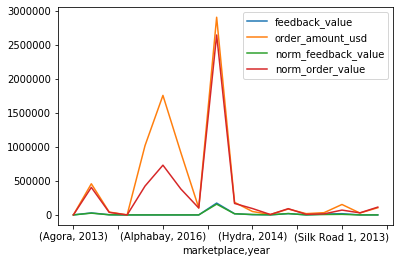

In [134]:
feedbacks3.groupby(["marketplace", "year"]).sum().plot()

In [139]:
feedbacks3.groupby(["marketplace", "year"])['order_amount_usd'].boxplot

AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'

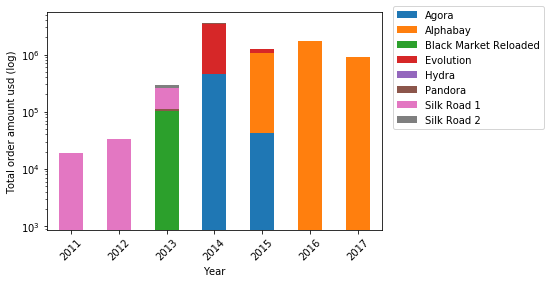

In [151]:
feedbacks3.groupby(["year", "marketplace"]).order_amount_usd.sum().unstack().plot(kind = "bar", stacked = True)
plt.yscale('log')
plt.ylabel('Total order amount usd (log)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

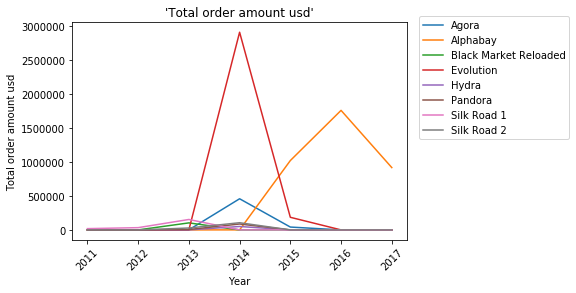

In [159]:
feedbacks3.groupby(["year", "marketplace"]).order_amount_usd.sum().unstack().fillna(value = 0).plot(title = "'Total order amount usd'")
#plt.yscale('log')
plt.ylabel('Total order amount usd')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

In [15]:
feedbacks3["month"] = pd.DatetimeIndex(feedbacks3["date"]).month

<ipython-input-15-e03d5d02ea62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks3["month"] = pd.DatetimeIndex(feedbacks3["date"]).month


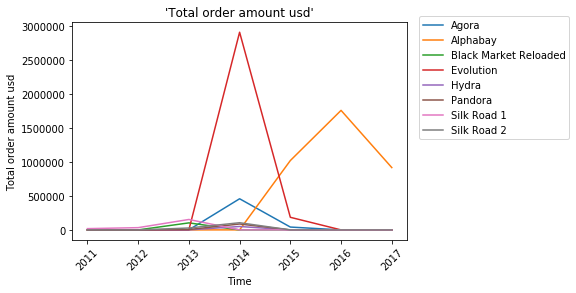

In [192]:
feedbacks3.groupby(["year", "marketplace"]).order_amount_usd.sum().unstack().fillna(value = 0).plot(title = "'Total order amount usd'")
#plt.yscale('log')
plt.ylabel('Total order amount usd')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

Text(0.5, 0, 'Time')

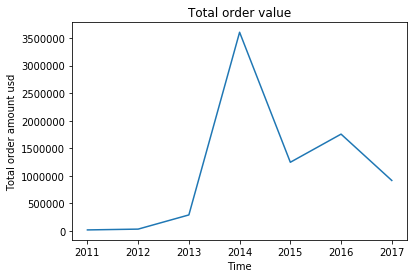

In [195]:
feedbacks3.groupby("year").order_amount_usd.sum().plot(title = "Total order value")
plt.ylabel('Total order amount usd')
plt.xlabel('Time')

In [173]:
xticks = feedbacks3.groupby(["year", "month", "marketplace"]).order_amount_usd.sum().unstack().unstack().index.values

In [174]:
xticks

array([2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

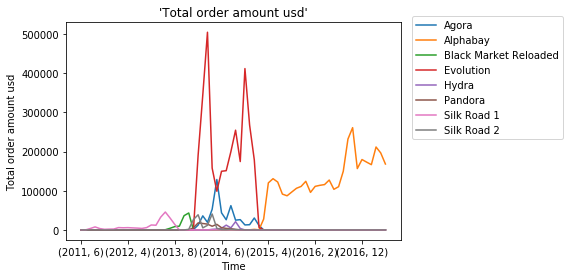

In [180]:
feedbacks3.groupby(["year", "month", "marketplace"]).order_amount_usd.sum().unstack().fillna(value = 0).plot(title = "'Total order amount usd'")
#plt.yscale('log')
plt.ylabel('Total order amount usd')
plt.xlabel('Time')
#plt.xticks(ticks = [2011, 2012, 2013, 2014, 2015, 2016, 2017])
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

In [18]:
#feedbacks3.groupby(by=["year", "month"]).groupby(by="marketplace").sum()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [184]:
feedbacks3.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value,year,month
22850,e10fbce446b45a23a035e84bd497e214,cash-out,Alphabay,00019696ba886889ed7612e2938f97a0,2017-05-15,db0dd81b0c5c8158c44ddbfaa6e89f9f,2371addc4198d8ca4e938071c8670c79,For My 30 American Dollars I Was Mad . Mad As ...,RANDOM USA TRACK2 101/201 With City-zip-state,0.0,30.0,0.0,12.485747,2017,5
22851,7329cb0ae553927ba4e5919c26793b8c,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-22,eaa7765373397f14c29f97e15dd379b1,ddb9aab6486cdbc03021cdde20e1e00f,Quick delivery and great stealth packaging,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738,2016,5
22852,8dea34c217b7a5f5c1b12c59b3b173f5,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-14,ec786c008009944e566f913fe2ddf4f6,ddb9aab6486cdbc03021cdde20e1e00f,"Lightning fast shipping, thanks!",Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738,2016,5
22853,b657e90c8ae0468de3f01ec82f2d19b0,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-06-01,bec72ba38d386a1f213b7f1e5b06c0ea,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738,2016,6
22854,e71da61b095bf11a2413ad3ada675094,cash-out,Alphabay,000b75bdcddb7357d9703d83d5472bcb,2016-05-26,d6b8b3c5e4fbd6566997bda2888d77a9,ddb9aab6486cdbc03021cdde20e1e00f,No comment,Adderal 30mg x 1 **wait is over now in stock**,0.0,21.6,0.0,8.989738,2016,5


In [18]:
#per = feedbacks3.date.dt.to_period("M")
#g = feedbacks3.groupby(per)

array(['Evolution', 'Silk Road 1', 'Alphabay', 'Black Market Reloaded'],
      dtype=object)

In [187]:
g.sum()

,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value,year,month
date,,,,,,
2011-06,70.0,24.03,32.382763,11.116540,28154,84
2011-07,75.0,175.65,34.695817,81.257605,30165,105
2011-08,136.0,3703.13,62.915082,1713.108302,56308,224
2011-09,357.0,7696.36,165.152091,3560.420025,150825,675
2011-10,294.0,3462.36,136.007605,1601.725475,124682,620
...,...,...,...,...,...,...
2017-01,0.0,172948.14,0.000000,71979.556556,14465924,7172
2017-02,0.0,166531.41,0.000000,69308.967674,14550638,14428
2017-03,0.0,211602.37,0.000000,88067.120924,18237714,27126


In [16]:
feedbacks3.groupby("marketplace").sum()

,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value,year
marketplace,,,,,
Alphabay,0.0,37.00,0.000000,15.399088,6048
Black Market Reloaded,0.0,620.62,0.000000,612.233243,54351
Evolution,10945.0,329172.80,9962.406484,299621.127182,7371241
Silk Road 1,244.0,2795.35,112.877060,1293.159379,100627


In [197]:
feedbacks.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


AttributeError: 'AxesSubplot' object has no attribute 'area'

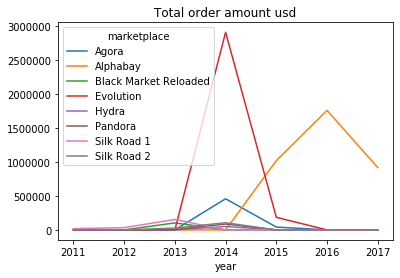

In [199]:
feedbacks3.groupby(["year", "marketplace"]).order_amount_usd.sum().unstack().fillna(value = 0).plot(title = "Total order amount usd").area
#plt.yscale('log')
plt.ylabel('Total order amount usd')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

In [9]:
order_amounts_total = feedbacks3.groupby(["year", "marketplace"]).order_amount_usd.sum().unstack().fillna(value = 0)

KeyError: 'year'

In [202]:
order_amounts_total

marketplace,Agora,Alphabay,Black Market Reloaded,Evolution,Hydra,Pandora,Silk Road 1,Silk Road 2
year,,,,,,,,
2011,0.00,0.00,0.00,0.00,0.00,0.00,18643.69,0.00
2012,0.00,0.00,0.00,0.00,0.00,0.00,33150.57,0.00
2013,859.02,0.00,103066.17,0.00,0.00,5515.51,153266.66,27801.67
2014,457502.17,273.84,0.00,2904263.22,50142.32,86660.43,0.00,105451.80
2015,41850.70,1018814.84,0.00,185150.25,0.00,0.00,0.00,0.00
2016,0.00,1756184.37,0.00,0.00,0.00,0.00,0.00,0.00
2017,0.00,915721.16,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
x = list(order_amounts_total.index.values)
y1 = list(order_amounts_total.Agora)
y2 = list(order_amounts_total.Alphabay)
y3 = list(order_amounts_total["Black Market Reloaded"])
y4 = list(order_amounts_total.Evolution)
y5 = list(order_amounts_total.Hydra)
y6 = list(order_amounts_total.Pandora)
y7 = list(order_amounts_total["Silk Road 1"])
y8 = list(order_amounts_total["Silk Road 2"])

NameError: name 'order_amounts_total' is not defined

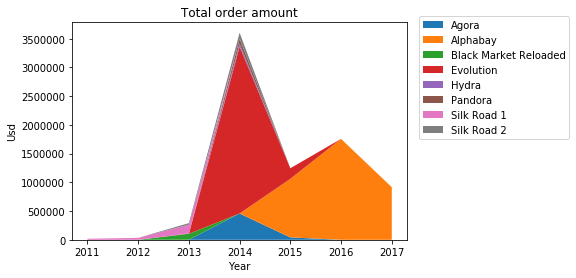

In [231]:
plt.stackplot(x,y1, y2, y3, y4, y5, y6, y7, y8, labels=['Agora','Alphabay','Black Market Reloaded', "Evolution", "Hydra", "Pandora", "Silk Road 1", "Silk Road 2"])
plt.title("Total order amount")
plt.xlabel("Year")
plt.ylabel("Usd")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

# Looking at the percentage/share of cash-out vs market value over time

In [278]:
feedbacks_no_other = feedbacks[feedbacks.category != "other"]

In [234]:
feedbacks_cash_out = feedbacks[feedbacks.category == "cash-out"]
feedbacks_other = feedbacks[feedbacks.category != "cash-out"]

In [238]:
feedbacks_cash_out["year"] = pd.DatetimeIndex(feedbacks_cash_out["date"]).year
feedbacks_cash_out["month"] = pd.DatetimeIndex(feedbacks_cash_out["date"]).month
feedbacks_other["year"] = pd.DatetimeIndex(feedbacks_other["date"]).year
feedbacks_other["month"] = pd.DatetimeIndex(feedbacks_other["date"]).month

C:\Users\cvolt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cvolt\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cvolt\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [249]:
feedbacks_cash_out.groupby(["year","month"]).order_amount_usd.sum().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,24.03,175.65,3703.13,7696.36,3462.36,1564.28,2017.88
2012,2232.73,5925.98,5457.62,5821.42,5203.89,4650.53,3858.40,NaN,NaN,NaN,NaN,NaN
2013,NaN,6227.68,12689.19,12030.07,32660.84,46155.92,34684.25,22680.42,9640.21,36361.73,44663.57,32715.15
2014,258779.34,401986.51,550393.23,261861.04,247936.30,204378.91,194062.38,271785.25,302679.17,204940.46,424454.88,281036.31
2015,210512.41,18135.08,27687.65,120032.50,130726.04,122189.32,91400.40,87090.68,96711.80,106192.07,111049.44,124088.40
2016,95777.28,111154.52,113807.22,115683.76,127276.94,103586.35,110317.86,149605.41,231868.82,260963.84,156528.91,179613.46
2017,172948.14,166531.41,211602.37,196473.22,168166.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
feedbacks2.loc[feedbacks2.category != "cash-out", 'other'] = 0

C:\Users\cvolt\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [280]:
feedbacks_no_other.category.unique()

array(['cash-out'], dtype=object)

In [261]:
feedbacks_no_other["month"] = pd.DatetimeIndex(feedbacks["date"]).month
feedbacks_no_other["year"] = pd.DatetimeIndex(feedbacks["date"]).year

In [305]:
order_category.head()

category,cash-out,other
year,,
2011,18643.69,2.178876e+04
2012,33150.57,4.072370e+05
2013,290509.03,2.410789e+06
2014,3604293.78,8.577268e+06
2015,1245815.79,1.533710e+06


In [274]:
order_category = feedbacks.groupby(['year','category']).sum().order_amount_usd.unstack().fillna(value = 0)
x = list(order_category.index.values)
y1 = list(order_category["cash-out"])
y2 = list(order_category["other"])

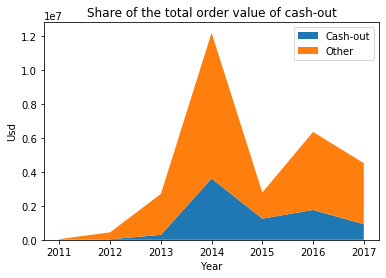

In [277]:
plt.stackplot(x,y1, y2, labels=['Cash-out','Other'])
plt.title("Share of the total order value of cash-out")
plt.xlabel("Year")
plt.ylabel("Usd")
plt.legend(loc = 'upper right')

# Without other

In [7]:
feedbacks_origineel = pd.read_csv(r'./feedbacks.csv')

In [8]:
feedbacks_no_other = feedbacks_origineel[feedbacks_origineel.category != "other"]

In [9]:
feedbacks_no_other.category.unique()

array(['malware', 'app', 'website', 'hosting', 'exploits', 'botnet',
       'e-mail', 'phone', 'RAT', 'cash-out', 'other - account',
       'other - custom', 'other - fake', 'other - guide',
       'other - pirated software',
       'other - voucher/invite/codes/lottery/gift'], dtype=object)

In [10]:
feedbacks_no_other.loc[feedbacks_no_other.category != "cash-out", 'other'] = 0

C:\Users\Spiros\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Spiros\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
feedbacks_no_other.category.unique()

array(['malware', 'app', 'website', 'hosting', 'exploits', 'botnet',
       'e-mail', 'phone', 'RAT', 'cash-out', 'other - account',
       'other - custom', 'other - fake', 'other - guide',
       'other - pirated software',
       'other - voucher/invite/codes/lottery/gift'], dtype=object)

In [12]:
feedbacks_no_other.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value,other
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523,0.0
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341,0.0
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341,0.0
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341,0.0
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341,0.0


In [13]:
feedbacks_no_other.loc[feedbacks_no_other.category != "cash-out", 'category'] = "other"

C:\Users\Spiros\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
feedbacks_no_other.drop(columns = ["other"], inplace = True)

C:\Users\Spiros\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
feedbacks_no_other.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd,norm_feedback_value,norm_order_value
0,eccd15d45510ce42400794e6f714c463,other,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37,0.0,3.483523
1,245b10f91e425118726326e25d795f05,other,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
2,6e6943496caeaac4cf8ed27cc7f5c99c,other,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
3,89b5e952f30a336bcf5a019033dba49e,other,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00,0.0,2.913341
4,b2ba7249464afb641a577f893ff8d1c3,other,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00,0.0,2.913341


In [16]:
feedbacks_no_other["month"] = pd.DatetimeIndex(feedbacks_no_other["date"]).month
feedbacks_no_other["year"] = pd.DatetimeIndex(feedbacks_no_other["date"]).year

<ipython-input-16-dd5c4e654980>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks_no_other["month"] = pd.DatetimeIndex(feedbacks_no_other["date"]).month
<ipython-input-16-dd5c4e654980>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks_no_other["year"] = pd.DatetimeIndex(feedbacks_no_other["date"]).year


In [17]:
order_category2 = feedbacks_no_other.groupby(['year','category']).sum().order_amount_usd.unstack().fillna(value = 0)
x = list(order_category2.index.values)
y1 = list(order_category2["cash-out"])
y2 = list(order_category2["other"])

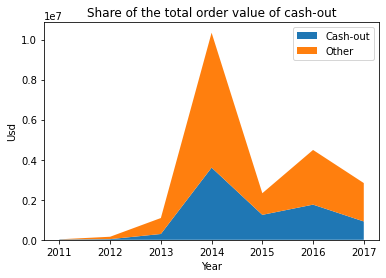

In [18]:
plt.stackplot(x,y1, y2, labels=['Cash-out','Other'])
plt.title("Share of the total order value of cash-out")
plt.xlabel("Year")
plt.ylabel("Usd")
plt.legend(loc = 'upper right')

In [19]:
order_category3 = feedbacks_no_other.groupby(["date", "category"]).sum().order_amount_usd.unstack().fillna(value = 0)
x = list(order_category3.index.values)
y1 = list(order_category3["cash-out"])
y2 = list(order_category3["other"])

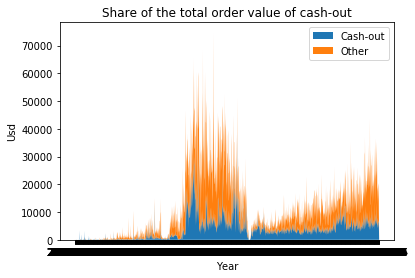

In [310]:
plt.stackplot(x,y1, y2, labels=['Cash-out','Other'])
plt.title("Share of the total order value of cash-out")
plt.xlabel("Year")
plt.ylabel("Usd")
plt.legend(loc = 'upper right')

In [20]:
order_category3.groupby(pd.Grouper(freq = "M"))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [21]:
order_category3.index = pd.to_datetime(order_category3.index)


In [22]:
order_category4 = order_category3.groupby(pd.Grouper(freq = "M")).sum()

In [23]:
order_category4

category,cash-out,other
date,,
2011-06-30,24.03,21.07
2011-07-31,175.65,57.59
2011-08-31,3703.13,119.78
2011-09-30,7696.36,982.22
2011-10-31,3462.36,1017.46
...,...,...
2017-01-31,172948.14,312479.69
2017-02-28,166531.41,322597.58
2017-03-31,211602.37,471962.38


In [24]:
x = list(order_category4.index.values)
y1 = list(order_category4["cash-out"])
y2 = list(order_category4["other"])

NameError: name 'Axes' is not defined

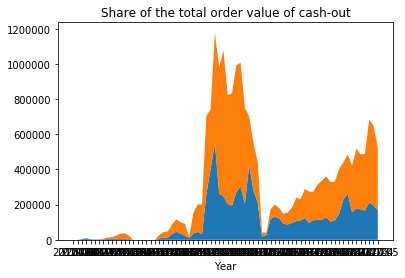

In [364]:
plt.stackplot(x,y1, y2, labels=['Cash-out','Other'])
plt.title("Share of the total order value of cash-out")
plt.xlabel("Year")
plt.ylabel("Usd")
plt.legend(loc = 'upper right')

In [35]:
import datetime
series = pd.Series(order_category4.index.values)
#x = list(series.dt.strftime('%Y-%m'))
"""for line in x:
    month = line[5:]
    if month = """

x = list(series.dt.strftime('%Y-%b'))
#x

['2011-Jun',
 '2011-Jul',
 '2011-Aug',
 '2011-Sep',
 '2011-Oct',
 '2011-Nov',
 '2011-Dec',
 '2012-Jan',
 '2012-Feb',
 '2012-Mar',
 '2012-Apr',
 '2012-May',
 '2012-Jun',
 '2012-Jul',
 '2012-Aug',
 '2012-Sep',
 '2012-Oct',
 '2012-Nov',
 '2012-Dec',
 '2013-Jan',
 '2013-Feb',
 '2013-Mar',
 '2013-Apr',
 '2013-May',
 '2013-Jun',
 '2013-Jul',
 '2013-Aug',
 '2013-Sep',
 '2013-Oct',
 '2013-Nov',
 '2013-Dec',
 '2014-Jan',
 '2014-Feb',
 '2014-Mar',
 '2014-Apr',
 '2014-May',
 '2014-Jun',
 '2014-Jul',
 '2014-Aug',
 '2014-Sep',
 '2014-Oct',
 '2014-Nov',
 '2014-Dec',
 '2015-Jan',
 '2015-Feb',
 '2015-Mar',
 '2015-Apr',
 '2015-May',
 '2015-Jun',
 '2015-Jul',
 '2015-Aug',
 '2015-Sep',
 '2015-Oct',
 '2015-Nov',
 '2015-Dec',
 '2016-Jan',
 '2016-Feb',
 '2016-Mar',
 '2016-Apr',
 '2016-May',
 '2016-Jun',
 '2016-Jul',
 '2016-Aug',
 '2016-Sep',
 '2016-Oct',
 '2016-Nov',
 '2016-Dec',
 '2017-Jan',
 '2017-Feb',
 '2017-Mar',
 '2017-Apr',
 '2017-May']

AttributeError: 'function' object has no attribute 'savefig'

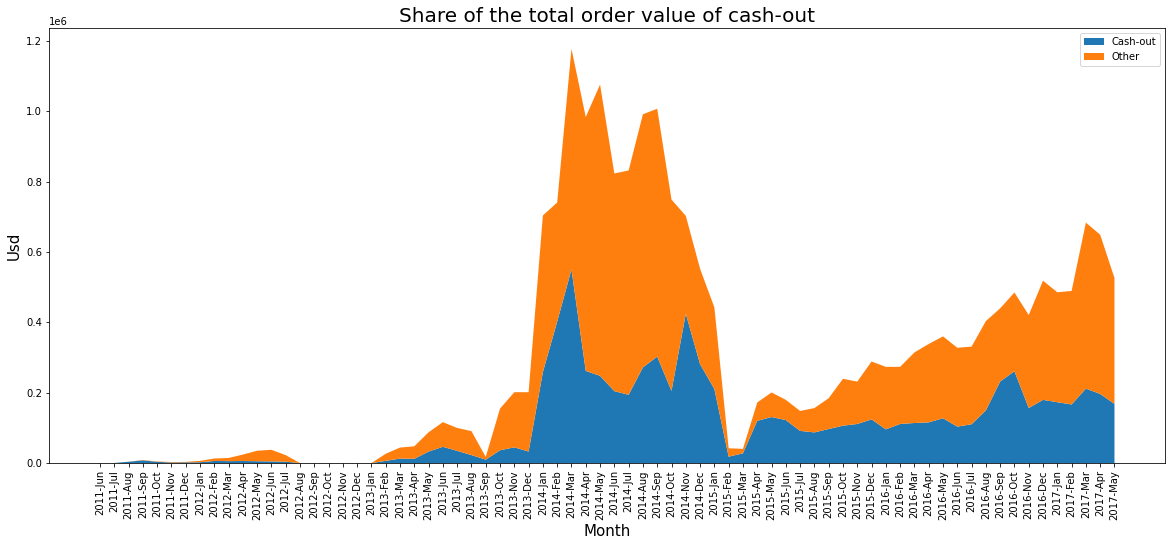

In [38]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.stackplot(x,y1, y2, labels=['Cash-out','Other'])
plt.title("Share of the total order value of cash-out", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Usd", fontsize=15)
plt.legend(loc = 'upper right')



In [339]:
x

['2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05']